<a class="anchor" id="0"></a>
# [AI-ML-DS : Training for beginners](https://www.kaggle.com/vbmokin/ai-ml-ds-training-for-beginners-in-kaggle). Level 3 (difficult). 2020
## Kaggle GM, Prof. [@vbmokin](https://www.kaggle.com/vbmokin)
### [Vinnytsia National Technical University](https://vntu.edu.ua/), Ukraine
#### [Chair of the System Analysis and Information Technologies](http://mmss.vntu.edu.ua/index.php/ua/)

### It is recommended to start studying this course from notebooks:
* [AI-ML-DS Training. L1T : Titanic - Decision Tree](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l1t-titanic-decision-tree)
* [AI-ML-DS Training. L1T : NH4 - linear regression](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l1t-nh4-linear-regression)
* [AI-ML-DS Training. L2A: NH4 - Tree Regress models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l2t-nh4-tree-regress-models)
* [BOD prediction in river - 15 regression models](https://www.kaggle.com/vbmokin/bod-prediction-in-river-15-regression-models)

and then move on to this notebook.

## Dataset [Ammonium prediction in river water](https://www.kaggle.com/vbmokin/ammonium-prediction-in-river-water)

Dataset has data of the Ammonium ions concentration in river water (the maximum permissible value in Ukraine is 0.5 mg/cub. dm).

Ammonium ions (NH4) concentration is measured in mg/cub. dm (ie milligrams in the cubic decimeter).

Datasets has data of river water quality from 8 consecutive stations of the state water monitoring system for Pivdennyi Bug river (from the source of the river to the water intake of the city of Vinnytsia).

Target is a NH4 concentration in the river crossection with the water intake of the Vinnytsia city.

Data for the 1997-2019.

### Possible Tasks:

* Analysis of data dependences, including EDA.

* Prediction the target data (water quaity in the target station) with the highest accuracy.

* Analysis of impact on the prediction accuracy in target station from the different number of stations (1, 2, ... 7).

### Map of the stations:
http://monitoring.davr.gov.ua/EcoWaterMon/GDKMap/Index

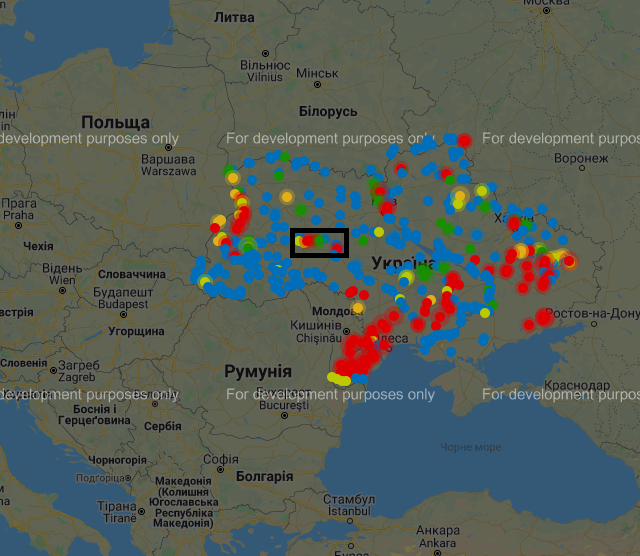

The upper reaches of the Pivdennyi Bug river

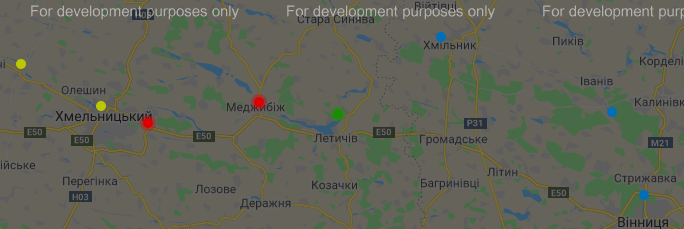
* 1 - the source of the river (see at the station first on the left), 
* ....
* 8 (target) - the place of water intake in Vinnytsia (see at the station in the lower right corner)

## Acknowledgements
* [Data Science for tabular data: Advanced Techniques](https://www.kaggle.com/vbmokin/data-science-for-tabular-data-advanced-techniques)
* [EDA for tabular data: Advanced Techniques](https://www.kaggle.com/vbmokin/eda-for-tabular-data-advanced-techniques)
* [Datasets for river water quality prediction](https://www.kaggle.com/vbmokin/datasets-for-river-water-quality-prediction)
* [Heart Disease - Automatic AdvEDA & FE & 20 models](https://www.kaggle.com/vbmokin/heart-disease-automatic-adveda-fe-20-models)
* [BOD prediction in river - 15 regression models](https://www.kaggle.com/vbmokin/bod-prediction-in-river-15-regression-models)
* [The system "MONITORING AND ENVIRONMENTAL ASSESSMENT OF WATER RESOURCES OF UKRAINE", State Agency of Water Resources of Ukraine](http://monitoring.davr.gov.ua/EcoWaterMon/GDKMap/Index)

<a class="anchor" id="0.1"></a>
## Table of Contents

1. [Import libraries](#1)
1. [Download data](#2)
1. [EDA & FE & Preprocessing data](#3)
    - [Statistics & FE](#3.1)
1. [Modeling](#4)
    - [NN Regressor](#4.1)
    - [NN Regressor with Dropout](#4.2)
    - [MLP Regressor](#4.3)    
1. [Test prediction](#5)
1. [Results visualization](#6)
1. [Select the best model](#7)

## 1. Import libraries<a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Work with Data - the main Python libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, GridSearchCV

# Modelling - sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Modeling - NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import ReduceLROnPlateau
#import tensorflow as tf

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.simplefilter('ignore')

## 2. Download data<a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Download training data
train = pd.read_csv('../input/ammonium-prediction-in-river-water/train.csv')

In [ ]:
# Display the first 5 rows of the training dataframe.
train.head()

In [ ]:
# Information for training data
train.info()

In [ ]:
# Download test data
test = pd.read_csv('../input/ammonium-prediction-in-river-water/test.csv')

In [ ]:
# Display the 7 last rows of the training dataframe
test.tail()

In [ ]:
test.info()

## 3. EDA & FE & Preprocessing data<a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

### 3.1. Statistics & FE<a class="anchor" id="3.1"></a>

[Back to Table of Contents](#0.1)

The analysis showed that many values are only available in stations 1 and 2, while others have much less data. I propose select only these two stations.

In [ ]:
# Select the stations with the most data in training dataset
train = train.drop(['Id','3','4','5','6','7'], axis = 1)
train = train.dropna().reset_index(drop=True)
train.info()

In [ ]:
# Display the statistics for training data
train.describe()

In [ ]:
# Selecting a target featute and removing it from training dataset
target = train.pop('target')

In [ ]:
# Select the stations with the most data in test dataset
test = test.drop(['Id','3','4','5','6','7'], axis = 1)
test = test.dropna().reset_index(drop=True)

In [ ]:
# Display basic information about the test data
test.info()

### 3.3. Training data splitting<a class="anchor" id="3.3"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Training data splitting to new training (part of the all training) and validation data
train_all = train.copy()
target_all = target.copy()
train, valid, target_train, target_valid = train_test_split(train_all, target_all, test_size=0.2, random_state=0)

In [ ]:
train

In [ ]:
# Display information about new training data
train.info()

In [ ]:
# Display information about validation data
valid.info()

## 4. Modeling<a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

In [ ]:
def acc(y_true, y_pred):
    # Calculation accuracy of prediction
    return r2_score(y_true, y_pred)

In [ ]:
# Creation the dataframe with the resulting score of all models
result = pd.DataFrame({'model' : ['NN Regressor', 'NN Regressor with Dropout', 'MLP Regressor'], 
                       'train_score': 0, 'train_mse': 0, 'valid_score': 0, 'valid_mse': 0})
result

### 4.1. NN Regressor<a class="anchor" id="4.1"></a>

[Back to Table of Contents](#0.1)

### Example of the NN structure:

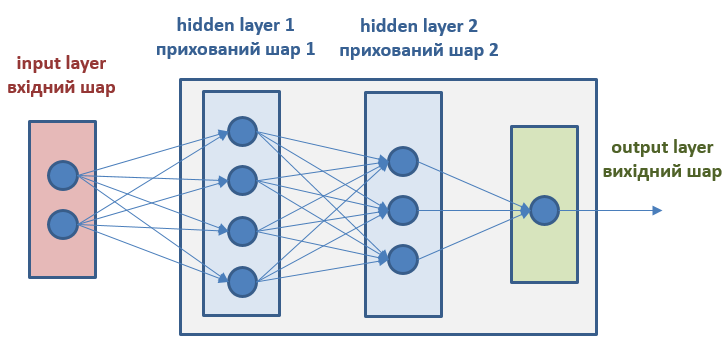

### TASK: Experiment with:
* batch size
* units in layers 
* activation functions
* epochs number
* patience and factor in ReduceLROnPlateau

In [ ]:
batch_size_num = 32
#batch_size_num = int(len(train)/5)
#batch_size_num

In [ ]:
%%time
def build_nn():

    # Initializing the NN with 3 layers including 2 hidden layers
    model = Sequential()

    # The first hidden layer of the NN with input data
    model.add(Dense(units=4, activation='relu', input_shape=(len(train.columns),)))
    
    # The second hidden layer of the NN
    model.add(Dense(units=3, activation='relu'))
    
    # The output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compiling the NN
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    learning_rate_reduction = ReduceLROnPlateau(monitor='val_mse', 
                                    patience=3, 
                                    verbose=1, 
                                    factor=0.5, 
                                    min_lr=0.0001)
    return model

nn_model = build_nn()
nn_model.fit(train, target_train, batch_size=batch_size_num, epochs=200, validation_data=(valid, target_valid), verbose=0)

# Drawing metrics plot
plt.plot(nn_model.history.history['mse'])
plt.title('Metrics of NN model')
plt.xlabel('Epochs')
plt.ylabel('Metrics "Mean Square Error"') 
plt.show()

# Prediction for training data
y_train_nn = nn_model.predict(train)

# Accuracy of model
acc_pred = round(acc(target_train, y_train_nn), 2)
print(f'Accuracy of NN model model training is {acc_pred}')

# Save to result DataFrame
result.loc[result['model'] == 'NN Regressor', 'train_score'] = acc_pred
result.loc[result['model'] == 'NN Regressor', 'train_mse'] = mse(target_train, y_train_nn)

In [ ]:
# NN structure and parameters
nn_model.summary()

In [ ]:
# Print rounded acc_pred to 2 decimal values after the text
y_val_nn = nn_model.predict(valid)
acc_pred_valid = round(acc(target_valid, y_val_nn),2)
result.loc[result['model'] == 'NN Regressor', 'valid_score'] = acc_pred_valid
result.loc[result['model'] == 'NN Regressor', 'valid_mse'] = round(mse(target_valid, y_val_nn),2)
print(f'Accuracy of NN Regressor model prediction for valid dataset is {acc_pred_valid}')

**ADDITIONAL TASK:** Experiment with number of hidden layers and metrics.

### 4.2. NN Regressor with Dropout<a class="anchor" id="4.2"></a>

[Back to Table of Contents](#0.1)

### TASK: Experiment with:
* batch size
* units in layers 
* activation functions
* epochs number
* patience and factor in ReduceLROnPlateau
* Dropout parameter

In [ ]:
%%time
def build_nn2():

    # Initializing the NN with 3 layers including 2 hidden layers and Dropout
    model = Sequential()

    # The first hidden layer of the NN with input data
    model.add(Dense(units=4, activation='relu', input_shape=(len(train.columns),)))
    
    # Dropout
    model.add(Dropout(0.2))
    
    # The second hidden layer of the NN
    model.add(Dense(units=3, activation='relu'))
    
    # The output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compiling the NN
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_mse', 
                                    patience=3, 
                                    verbose=1, 
                                    factor=0.05, 
                                    min_lr=0.0001)
    
    return model

nn_model2 = build_nn2()
nn_model2.fit(train, target_train, batch_size=batch_size_num, epochs=400, validation_data=(valid, target_valid), verbose=2)

# Drawing metrics plot
plt.plot(nn_model2.history.history['mse'])
plt.title('Metrics of NN Regressor with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error') 
plt.show()

# Prediction for training data
y_train_nn2 = nn_model2.predict(train)

# Accuracy of model
acc_pred = round(acc(target_train, y_train_nn2), 2)
print(f'Accuracy of NN Regressor with Dropout training is {acc_pred}')

# Save to result DataFrame
result.loc[result['model'] == 'NN Regressor with Dropout', 'train_score'] = acc_pred
result.loc[result['model'] == 'NN Regressor with Dropout', 'train_mse'] = round(mse(target_train, y_train_nn),2)

In [ ]:
# Print rounded acc_pred to 2 decimal values after the text
y_val_nn2 = nn_model2.predict(valid)
acc_pred_valid = round(acc(target_valid, y_val_nn2),2)
result.loc[result['model'] == 'NN Regressor with Dropout', 'valid_score'] = acc_pred_valid
result.loc[result['model'] == 'NN Regressor with Dropout', 'valid_mse'] = mse(target_valid, y_val_nn2)
print(f'Accuracy of NN Regressor with Dropout prediction for valid dataset is {acc_pred_valid}')

**ADDITIONAL TASK:** Experiment with number of hidden layers and metrics.

### 4.3. MLP Regressor<a class="anchor" id="4.3"></a>

[Back to Table of Contents](#0.1)

### TASK: Experiment with:
* hidden_layer_sizes (maximum value)
* max_iter
* cv (cross-validation)

In [ ]:
%%time
# MLPRegressor
mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,10)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [100]
              }

# Training model
mlp_CV = GridSearchCV(mlp, param_grid=param_grid, cv=5, verbose=False)
mlp_CV.fit(train, target_train)
print(mlp_CV.best_params_)

# Prediction for training data
y_train_mlp = mlp_CV.predict(train)

# Accuracy of model
acc_pred = round(acc(target_train, y_train_mlp), 2)
print(f'Accuracy of MLP Regressor model training is {acc_pred}')

# Save to result dataframe
result.loc[result['model'] == 'MLP Regressor', 'train_score'] = acc_pred
result.loc[result['model'] == 'MLP Regressor', 'train_mse'] = mse(target_train, y_train_nn)

In [ ]:
# Print rounded acc_pred to 2 decimal values after the text
y_val_mlp = mlp_CV.predict(valid)
acc_pred_valid = round(acc(target_valid, y_val_mlp),2)
result.loc[result['model'] == 'MLP Regressor', 'valid_score'] = acc_pred_valid
result.loc[result['model'] == 'MLP Regressor', 'valid_mse'] = round(mse(target_valid, y_val_mlp),2)
print(f'Accuracy of MLP Regressor model prediction for valid dataset is {acc_pred_valid}')

## 5. Test prediction<a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Prediction of target for test data for all models
y_test_nn = nn_model.predict(test)
y_test_nn2 = nn_model2.predict(test)
y_test_mlp = mlp_CV.predict(test)

## 6. Visualization<a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

In [ ]:
def plot_prediction(target, y_nn, y_nn2, y_mlp, data_name, MAV=0.5):
    # Building plot with target, Maximum allowable value (MAV) and 
    # prediction for the data_name (training, validation or test) data by 3 models
    
    x = np.arange(len(y_nn))
    plt.figure(figsize=(16,10))
    if target is not None:
        plt.scatter(x, target, label = "Target data", color = 'g')
    plt.scatter(x, y_nn, label = "NN prediction", color = 'b')
    plt.scatter(x, y_nn2, label = "NN with Dropout", color = 'm')
    plt.scatter(x, y_mlp, label = "MLP prediction", color = 'y')
    plt.plot(x, np.full(len(y_nn), MAV), label = "Maximum allowable value", color = 'r')
    plt.title(f'Prediction for the {data_name} data')
    plt.legend(loc='best')
    plt.grid(True)

In [ ]:
plot_prediction(target_train, y_train_nn, y_train_nn2, y_train_mlp, 'training')

In [ ]:
plot_prediction(target_valid, y_val_nn, y_val_nn2, y_val_mlp, 'validation')

In [ ]:
plot_prediction(None, y_test_nn, y_test_nn2, y_test_mlp, 'test')

## 7. Select the best model <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Display results of modeling
result.sort_values(by=['valid_score', 'train_score'], ascending=False)

In [ ]:
# Select models with minimal overfitting
result_best = result[(result['train_score'] - result['valid_score']).abs() < 5]
result_best.sort_values(by=['valid_score', 'train_score'], ascending=False)

In [ ]:
# Select the best model
result_best.nlargest(1, 'valid_score')

In [ ]:
# Find a name of the best model (with maximal valid score)
best_model_name = result_best.loc[result_best['valid_score'].idxmax(result_best['valid_score'].max()), 'model']

In [ ]:
print(f'The best model is "{best_model_name}"')

I hope you find this notebook useful and enjoyable.

Your comments and feedback are most welcome.

[Go to Top](#0)